# SCC.413 Applied Data Mining
# Week 17
# Tokenisation
# Answers

## Contents
- [Introduction](#intro)
- [Data](#data)
- [Code](#code)
- [Functions and imports](#functions)
- [Whitespace tokeniser](#whitespace)
- [Matching tokeniser](#matching)
- [NLTK tokeniser](#nltk)
- [Custom tokeniser](#custom)
- [Frequency analysis](#freq)
- [Exercise](#exercise)

<a name="intro"></a>
## Introduction

In this lab you will be honing your regular expression skills to perform the key task of tokenisation. The aim of tokenisation is to separate the text into meaningful components that are useful for future analysis (e.g. counting or annotating). Often the most logical token is a "word" (e.g. for "bag-of-words" based methods), but deciding what constitutes a word is not straight-forward. At other times, punctuation should be maintained (e.g. for part of speech annotation). You will see that choosing the wrong tokenisation can impact follow-on analysis of the text.

<a name="data"></a>
## Data

You will be trying different tokenisers. Four texts are provided for testing the tokenisers: `tweet.txt` - a single tweet for testing, `mumsnet.txt` - a collection of mumsnet forum posts as collected in last week's lab, and `mirrormirror.txt` & `charliex.txt` - short plot summaries of Star Trek episodes from Wikipedia. You are also welcome to collect and use your own data, utilising techniques from last week's lab. `tweet.txt` will be used primarily below, but feel free to swap any text throughout to aid your understanding.

You should upload all of the provided files to a Google Drive folder, you can then access these files from your Python code. See also the files tab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


We save the folder we are working from as a variable for easy access. You may need to edit the path to match your own.

In [ ]:
working_folder = '/content/gdrive/MyDrive/413/wk17/'

The below code adds the working folder to the system path, so you can import Python files from this folder.

In [ ]:
import sys
sys.path.append(working_folder)

<a name="code"></a>
## Code

If you prefer, `tokeniser.py` provides skeleton code for what is presented below. It simply runs the tokenisation method provided in `tokenise(text)` over the text file provided on the command line, printing out the tokens 1 per line (as is standard for tokenisation), and a total count of tokens found. To run the tokeniser over a file, run the below on your command line:

```
$ python3 tokeniser.py infile.txt
```

You can redirect the printed output to a file if you wish, simply add `> outfile.txt` to the end of the command.

<a name="functions"></a>
## Functions and Imports

We'll need regular expressions later (you might want to use the `regex` library instead). We'll also be using NLTK. You'll need to download a tokeniser model (this is only needed once).

In [ ]:
import re
import sys
import nltk
nltk.download('punkt') #download tokeniser models, will download first time, and find on second run. You can remove this line once installed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Functions will be used in this lab to define regularly used code.

First to open a file, tokenise it with a provided tokeniser method, and return a list of tokens:

In [ ]:
# takes file and tokeniser function, reads line by line, and returns list of tokens.
def tokenise_file(textfile, tokenise):
    with open(textfile, encoding="utf-8") as f:
        tokens = []
        lines = f.readlines()
        for line in lines:
            line_tokens = tokenise(line.strip())
            tokens.extend(line_tokens)
    return tokens

To print a list of tokens and the number of tokens present, and to a file:

In [ ]:
def print_tokens(tokens):
    for token in tokens: #iterate tokens and print one per line.
        print(token)
    print(f"Total: {len(tokens)} tokens")

In [ ]:
def save_tokens(tokens, outfile):
    with open(outfile, 'w', encoding="utf-8") as f:
        for token in tokens: #iterate tokens and output to file.
            f.write(token + '\n')
        f.write(f"Total: {len(tokens)} tokens")

We open our tweet file as follows:

In [ ]:
# for reference
with open(working_folder + "tweet.txt", encoding="utf-8") as f:
    tweet = f.read()
print(tweet)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh


<a name="whitespace"></a>
## Whitespace tokeniser

The simplest method of tokenisation is to just split the text on whitespace. The tokeniser below does just this, using Python's split function, simply on a space character.

In [ ]:
def whitespace_tokenise(text):
    return text.split(" ")

In [ ]:
#The whitespace_tokenise function has been defined, so can be passed as a callable object to the tokenise_file function.
tokens = tokenise_file(working_folder + "tweet.txt", whitespace_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we’re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach,
talking
to
students
about
#languages
and
language
careers!
Come
have
a
go
at
some
of
our
activities!
🌏#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 31 tokens


Observe the output, what potential issues can you observe? Are any characters missing from the original input? Can you improve it?

1. Can you think of a better white space tokeniser, e.g. that splits on multiple spaces, or other white space characters using a regular expression?

2. Can you come up with an alternative than using split, and instead using findall with a regular expression to do the same? (See simple tokeniser below)

In [ ]:
# 1. answer, actually given in the regex lab

whitespace_regex = re.compile(r"\s+")
split = whitespace_regex.split(tweet)
print_tokens(split)

This
week
we’re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach,
talking
to
students
about
#languages
and
language
careers!
Come
have
a
go
at
some
of
our
activities!
🌏#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 31 tokens


In [ ]:
# 2. answer

p = re.compile(r"\S+")
print_tokens(p.findall(tweet))

This
week
we’re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach,
talking
to
students
about
#languages
and
language
careers!
Come
have
a
go
at
some
of
our
activities!
🌏#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 31 tokens


<a name="matching"></a>
## Matching tokeniser

Next we can try a very simple tokeniser that instead of finding the space between tokens, looks for patterns that match words. We use a basic regular expression for this.

In [ ]:
def simple_match_tokenise(text):
    p = re.compile(r"[a-zA-Z]+")
    return p.findall(text)

In [ ]:
tokens = tokenise_file(working_folder + "tweet.txt", simple_match_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
re
at
a
careers
event
in
Blackpool
Pleasure
Beach
talking
to
students
about
languages
and
language
careers
Come
have
a
go
at
some
of
our
activities
LoveLanguages
LoveLancaster
Lancaster
CI
https
t
co
vQQWdrUuqh
Total: 37 tokens


Again, observe the output. What potential issues do you see? Why do you have more tokens? Are any characters missing from the original input?
- Can you invert the function to use split instead?

In [ ]:
# answer

not_letters_regex = re.compile(r"[^a-zA-Z]+")
split = not_letters_regex.split(tweet)
print_tokens(split)

This
week
we
re
at
a
careers
event
in
Blackpool
Pleasure
Beach
talking
to
students
about
languages
and
language
careers
Come
have
a
go
at
some
of
our
activities
LoveLanguages
LoveLancaster
Lancaster
CI
https
t
co
vQQWdrUuqh
Total: 37 tokens


<a name="nltk"></a>
## NLTK Tokeniser

All NLP toolkits, and many NLP tools themselves have built in tokenisers. [NLTK](http://www.nltk.org) is one of the best known ones and has a specialsed tokeniser for online text, and specifically Twitter data. Running the tokenisers is straight-forward, with methods provided below, `nltk_tokenise`: default, and `nltk_twitter_tokenise`: for Twitter. Note the "Twitter" tokeniser will be applicable to other online text too, e.g. forum data. Run these tokenisers over the texts and compare the results.

In [ ]:
def nltk_tokenise(text):
    return nltk.word_tokenize(text)

In [ ]:
def nltk_twitter_tokenise(text):
    twtok = nltk.tokenize.TweetTokenizer()
    return twtok.tokenize(text)

In [ ]:
tokens = tokenise_file(working_folder + "tweet.txt", nltk_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
’
re
at
a
#
careers
event
in
#
Blackpool
@
Pleasure_Beach
,
talking
to
students
about
#
languages
and
language
careers
!
Come
have
a
go
at
some
of
our
activities
!
🌏
#
LoveLanguages
#
LoveLancaster
@
Lancaster_CI
https
:
//t.co/vQQWdrUuqh
Total: 46 tokens


In [ ]:
tokens = tokenise_file(working_folder + "tweet.txt", nltk_twitter_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
’
re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach
,
talking
to
students
about
#languages
and
language
careers
!
Come
have
a
go
at
some
of
our
activities
!
🌏
#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 37 tokens


What is dealt with better by NLTK? And by the Twitter tokeniser? Any potential issues outstanding?

<a name="custom"></a>
## Custom tokeniser

The main task of this lab is to write your own tokeniser to list tokens useful for different purposes and different texts. You have a template for this in `custom_tokenise`. Here, a list of regular expression patterns are used to search for different types of tokens in turn, utilising *alternation* in one large compiled regular expression. You are provided with patterns for URLs, and simple words. Try this out on the tweet, the URLs should be tokenised separately.

In [ ]:
def custom_tokenise(text):
    URL = '(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*' #this is one possible URL pattern, more complicated patterns that catch different URLs are possible.
    word = '\w+'
    patterns = (URL, word)
    joint_patterns = '|'.join(patterns) #the patterns are split with | for alternation.
    p = re.compile(r'(?:{})'.format(joint_patterns)) # format is used to build the pattern, surrounding with (?:...) for non-captured grouping for alternation.
    return p.findall(text)

In [ ]:
tokens = tokenise_file(working_folder + "tweet.txt", custom_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
re
at
a
careers
event
in
Blackpool
Pleasure_Beach
talking
to
students
about
languages
and
language
careers
Come
have
a
go
at
some
of
our
activities
LoveLanguages
LoveLancaster
Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 32 tokens


A point to be aware of here is the ordering of the pattern sequence. Regular expressions in Python (and most other languages) process alternation options in order (left to right). This means a longer match (i.e. greedy) may be ignored if an earlier option leads to a successful match (regular expression finds will not overlap). It is therefore important to consider the order of the regular expressions, as a more general pattern may match some text before a more specific pattern has chance to see it. You can see this in action by swapping the URL and word patterns (`patterns = (word,URL)`) and tokenising the tweet again, now the URL will not be tokenised separately as the word pattern hits first and consumes the start of the URLs.

In order to aid understanding, a tokeniser is provided below specialised for the tokenising the `mirrormirror.txt`. Here the following tokenisation rules have been applied:
- all punctuation is separated as individual tokens
- titles and initials are single tokens (e.g. `Dr.` and `T.`)
- hyphenated words are a single token (e.g. `mirror-universe`)
- cases of possessive s (`'s`) are separated, e.g. `Kirk` & `'s` are separate tokens.

In [ ]:
def custom_tokenise_mirror(text):
    title = "[A-Z][a-z]?\."
    word = "[-\w]+" # - in character set at start doesn't need escaping.
    apos = "\'[a-z]*"
    other_chars = "[^\w\s]"
    leftover = "\S+" #Having a final catch all of "non-white-space" will pick up anything not explicity looked for earlier.
    patterns = (title, apos, other_chars, word, leftover) #leftover not actually needed here, as all caught in other_chars.
    joint_patterns = '|'.join(patterns)
    p = re.compile(r'(?:{})'.format(joint_patterns))
    return p.findall(text)

In [ ]:
tokens = tokenise_file(working_folder + "mirrormirror.txt", custom_tokenise_mirror)
save_tokens(tokens, "mirrormirror_tok.txt")

Observe the output in `mirrormirror_tok.txt`. Check you understand which patterns are catching which tokens?

Can you edit the tokeniser so that punctuation tokens aren't included, but the tokens above (titles and initials) with punctuation are still present?

**Advanced**: Try running your tokeniser on `charliex.txt` too. This is very similar to mirrormirror.txt, but it also contains contractions (e.g. `don't`). How are these dealt with by the above tokeniser? Ideally, `n't` should be a separate token, to represent `not`. This is tricky, without breaking other parts or adding pre- or post-processing. A hint is available if you would like it.

In [ ]:
# Answer
# hint is that you need a negative lookahead for what to do around 't.
# this is a good one to step through on a whiteboard to check the input string and where in the regex you are.

def custom_tokenise_charliex(text):
    title = "[A-Z][a-z]\."
    word = "[-\w]+(?!\'t)" #negative lookahead needed so that if get to don, but then lookahead to 't, then do is consumed, and n't is next in sequence. If we don't have t, and just lookahead for ', then Kirk would be rejected with ' next (Kirk's), so Kir would be consumed, k's would not be valid, so the k ends up being lost.
    nt = "n\'t"
    apos = "\'[a-z]*"
    other_chars = "[^\w\s]"
    leftover = "\S+"
    patterns = (title, nt, apos, other_chars, word)
    joint_patterns = "|".join(patterns)
    p = re.compile(r"(%s)" % joint_patterns)
    return p.findall(text)

In [ ]:
tokens = tokenise_file(working_folder + "charliex.txt", custom_tokenise_charliex)
save_tokens(tokens, "charliex_tok.txt")

<a name="freq"></a>
## Frequency analysis
Once we have text tokenised we can start to count words, and do some analysis. We will start in earnest with this next week. For now, we will do a simple counting of tokens and producing a frequency list and plot.

The `frequency_analysis` method takes a list of tokens (outputted from the various tokenise methods) and counts the frequency of each token. The list of tokens is printed alongside the frequency of each, in descending frequency order. A frequency plot is also produced, with the top 20 tokens as default.

Examining the frequency list (and token streams) can help to find common tokenisation issues.

You can try this on different texts. Increase the number of items in the plot, given enough text you should start to see a nice [Zipfian curve](https://en.wikipedia.org/wiki/Zipf\%27s_law). Try `cumulative=True`.

In [ ]:
%matplotlib inline

def frequency_analysis(tokens, top=20):
    freq = nltk.FreqDist(tokens)
    for key,val in freq.most_common(top):
        print(key,val,sep="\t")

    freq.plot(top, cumulative=False)

,	68
the	55
.	42
to	39
Kirk	33
and	33
Spock	20
"	17
a	16
that	14
of	14
's	12
his	12
their	11
Scott	10
for	10
in	10
transporter	9
is	9
McCoy	8


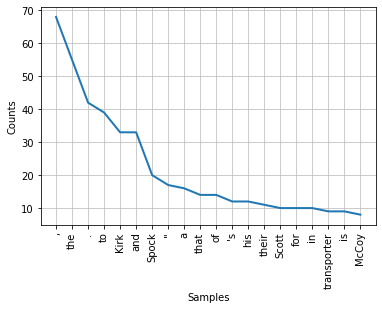

In [ ]:
tokens = tokenise_file(working_folder + "mirrormirror.txt", custom_tokenise_mirror)
frequency_analysis(tokens)

<a name="exercise"></a>
## Exercise

Build a tokeniser for the mumsnet forum data (`mumsnet.txt`) by building on the `custom_tokenise` method. Produce the frequency analysis as above. Tokenise the text with the following rules:
- all punctuation separated as individual tokens, unless sequences of punctuation (e.g. `!!!`), which should be combined to a single token.
- URLs, hashtags, and mentions as separate tokens
- hyphenated words as a single token
- words with apostrophes should be a single token (e.g. `don't`, `I'm` and `1940's`)
- **Advanced/Extra**: Emoticons separated as separate tokens (e.g. `:-)`)
- **Advanced/Extra**: You will find other sequences in the text that should be single tokens, deal with as many of these as possible for as clean a tokenisation as possible ready for creating a frequency list.

You may want to consider pre-processing (i.e. cleaning/normalising) the text to make tokenisation easier.

Remember, it's important to look at the text, the token list, and the frequency analysis to see issues you may need to deal with.

In [ ]:
# Exercise, edit the function below

def custom_tokenise_forum(text):
    URL = '(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*' #this is one possible URL pattern, more complicated patterns that catch different URLs are possible.
    word = '\w+'
    patterns = (URL, word)
    joint_patterns = '|'.join(patterns) #the patterns are split with | for alternation.
    p = re.compile(r'(?:{})'.format(joint_patterns)) # format is used to build the pattern, surrounding with (?:...) for non-captured grouping for alternation.
    return p.findall(text)

In [ ]:
# answer

def custom_tokenise_forum(text):
    URL = '(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*' #this is one possible URL pattern, more complicated patterns that catch different URLs are possible.
    word = '[-\'’\w]+'
    other_chars = "[^\w\s]+"
    leftover = "\S+"
    hashtagsmentions = "[#@]\w+"
    patterns = (URL, hashtagsmentions, other_chars, word, leftover)
    #patterns = (URL, word)
    joint_patterns = '|'.join(patterns) #the patterns are split with | for alternation.
    p = re.compile(r'(?:{})'.format(joint_patterns)) # format is used to build the pattern, surrounding with (?:...) for non-captured grouping for alternation.
    return p.findall(text)

the	120
I	61
it	57
a	55
to	55
and	53
of	35
is	34
s	33
toot	32
that	28
in	26
for	25
my	25
have	23
off	20
when	18
you	17
on	17
them	17
vtech	16
this	16
with	15
It	15
t	15
an	15
but	15
so	14
as	14
My	13
m	13
we	13
The	13
song	12
toy	12
one	12
has	11
toys	11
can	11
Vtech	11
up	11
are	10
just	10
me	10
over	10
annoying	9
get	9
be	9
walker	9
switch	9
like	9
they	9
singing	9
noisy	8
was	8
bought	8
not	8
at	8
out	8
We	8
DS	8
years	7
her	7
remember	7
all	7
he	7
still	7
night	7
which	7
ve	7
had	7
his	7
worst	6
button	6
cookie	6
jar	6
about	6
tech	6
too	6
Toot	6
from	6
our	6
batteries	6
little	6
love	6
old	5
most	5
she	5
us	5
go	5
head	5
way	5
cars	5
noise	5
got	5
put	5
Alfie	5
or	5
train	5
thread	5


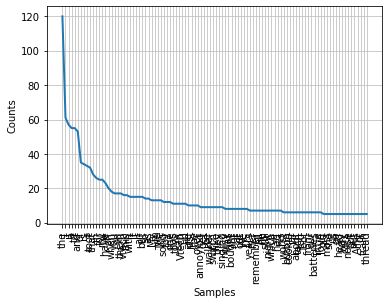

In [ ]:
tokens = tokenise_file(working_folder + "mumsnet.txt", custom_tokenise_forum)
save_tokens(tokens,"mumsnet_tok.txt")
frequency_analysis(tokens,100)